# importation de mes donneées d'analyse

In [166]:
import kaggle
import subprocess
import zipfile
import pandas as pd
import pandas as pd
import numpy as np

# Télécharger le dataset depuis Kaggle
subprocess.run(["kaggle", "datasets", "download", "-d", "retailrocket/ecommerce-dataset"])

# Décompresser le fichier zip téléchargé
with zipfile.ZipFile('ecommerce-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('../data/')

# Charger les fichiers CSV dans des DataFrames Pandas
category_tree = pd.read_csv('../data/category_tree.csv')
events = pd.read_csv('../data/events.csv')
item_properties_part1 = pd.read_csv('../data/item_properties_part1.csv')
item_properties_part2 = pd.read_csv('../data/item_properties_part2.csv')

# Afficher les premières lignes de chaque DataFrame pour inspection
print("Category Tree:")
print(category_tree.head())

print("\n Events:")
print(events.head())

print("\n Item Properties Part 1:")
print(item_properties_part1.head())

print("\n Item Properties Part 2:")
print(item_properties_part2.head())

Category Tree:
   categoryid  parentid
0        1016     213.0
1         809     169.0
2         570       9.0
3        1691     885.0
4         536    1691.0

 Events:
       timestamp  visitorid event  itemid  transactionid
0  1433221332117     257597  view  355908            NaN
1  1433224214164     992329  view  248676            NaN
2  1433221999827     111016  view  318965            NaN
3  1433221955914     483717  view  253185            NaN
4  1433221337106     951259  view  367447            NaN

 Item Properties Part 1:
       timestamp  itemid    property                            value
0  1435460400000  460429  categoryid                             1338
1  1441508400000  206783         888          1116713 960601 n277.200
2  1439089200000  395014         400  n552.000 639502 n720.000 424566
3  1431226800000   59481         790                       n15360.000
4  1431831600000  156781         917                           828513

 Item Properties Part 2:
       timestamp 

# I. Nettoyage des données pour faciliter mes analyses

# 1. fusionner des datas identiques

In [167]:
item_properties = pd.concat([item_properties_part1, item_properties_part2])
copie_items_properties=item_properties.copy()

print(f" nouvelle table des proprites : \n{copie_items_properties}")

 nouvelle table des proprites : 
             timestamp  itemid    property                             value
0        1435460400000  460429  categoryid                              1338
1        1441508400000  206783         888           1116713 960601 n277.200
2        1439089200000  395014         400   n552.000 639502 n720.000 424566
3        1431226800000   59481         790                        n15360.000
4        1431831600000  156781         917                            828513
...                ...     ...         ...                               ...
9275898  1433646000000  236931         929                           n12.000
9275899  1440903600000  455746           6                     150169 639134
9275900  1439694000000  347565         686                            610834
9275901  1433646000000  287231         867                            769062
9275902  1442113200000  275768         888  888666 n10800.000 746840 1318567

[20275902 rows x 4 columns]


# 2. Vérifier les valeurs manquantes# Vérifier les valeurs manquantes

In [168]:
print(f" valeurs manquantes pour la table item_properties : \n{item_properties.isnull().sum()}\n\n")
print(f" valeurs manquantes pour la table events : \n{events.isnull().sum()}\n\n")
print(f" valeurs manquantes pour la table categorie : \n{category_tree.isnull().sum()}\n\n")

 valeurs manquantes pour la table item_properties : 
timestamp    0
itemid       0
property     0
value        0
dtype: int64


 valeurs manquantes pour la table events : 
timestamp              0
visitorid              0
event                  0
itemid                 0
transactionid    2733644
dtype: int64


 valeurs manquantes pour la table categorie : 
categoryid     0
parentid      25
dtype: int64




# Analyse des valeurs manquantes :
# Table item_properties : Aucune valeur manquante, données complètes.
# Table events : transactionid manquant pour 2 733 644 lignes, indiquant des événements sans transaction (ex: vues, ajouts au # panier). ⚠️ Risque d’analyse incomplète si ces absences ne sont pas prises en compte.
# Table categorie : parentid manquant pour 25 catégories, probablement des catégories racines. ⚠️ Peut impacter l’analyse des # hiérarchies.

.................................................................................................................................
.................................................................................................................................
.................................................................................................................................
.................................................................................................................................
.................................................................................................................................
.................................................................................................................................
# II. analyse sur la table Events
.................................................................................................................................
.................................................................................................................................
.................................................................................................................................
.................................................................................................................................
.................................................................................................................................
.................................................................................................................................

# 1. observation sur la table

In [169]:
print(f"tête de la table : \n{events.head()}")

tête de la table : 
       timestamp  visitorid event  itemid  transactionid
0  1433221332117     257597  view  355908            NaN
1  1433224214164     992329  view  248676            NaN
2  1433221999827     111016  view  318965            NaN
3  1433221955914     483717  view  253185            NaN
4  1433221337106     951259  view  367447            NaN


# 2. amelioration ou conversion de timestamp en format date

In [170]:
events["timestamp"]= pd.to_datetime(events["timestamp"], unit="ms")

In [171]:
# occurence des valeurs de events 

event_attributes = events.groupby("event").size()
print(f"size_event : \n{event_attributes}")

size_event : 
event
addtocart        69332
transaction      22457
view           2664312
dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_24884\1693132528.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=event_attributes.index, y=event_attributes.values, palette="viridis")


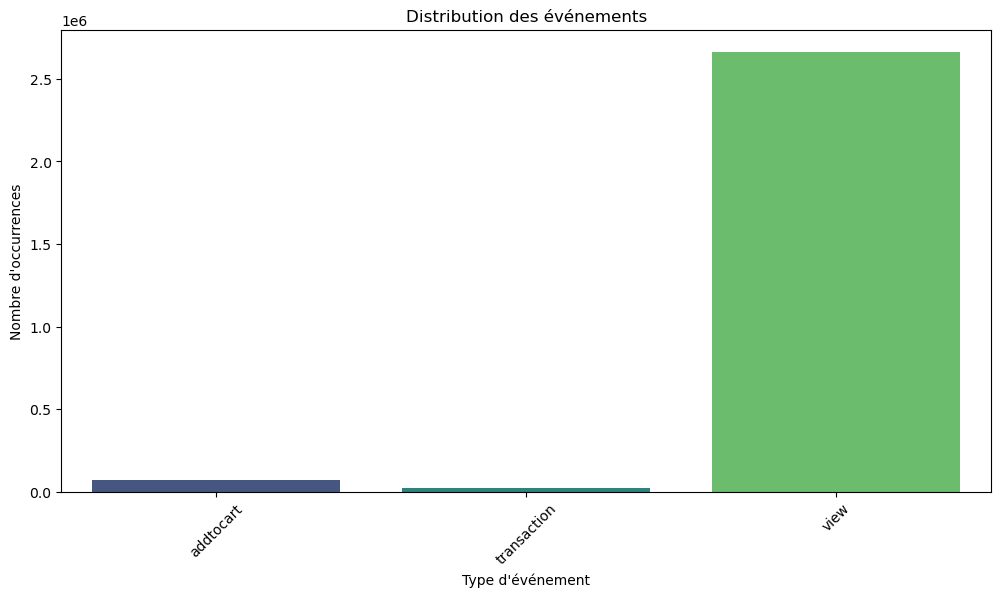

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns

# Création du graphique
plt.figure(figsize=(12, 6))
sns.barplot(x=event_attributes.index, y=event_attributes.values, palette="viridis")

# Ajout des titres et labels
plt.xlabel("Type d'événement")
plt.ylabel("Nombre d'occurrences")
plt.title("Distribution des événements")
plt.xticks(rotation=45)  # Rotation des labels pour une meilleure lisibilité

# Affichage du graphique
plt.show()


# 3. selectionne des valeurs unique d'event 

In [172]:
event_view = events[events["event"]=="view"]
event_addtocart = events[events["event"]=="addtocart"]
event_transaction = events[events["event"]=="transaction"]
print(f"selection_event view: \n\n{event_view}")
print(f"selection_event addtocart: \n\n{event_addtocart}")
print(f"selection_event transaction: \n\n{event_transaction}")

selection_event view: 

                      timestamp  visitorid event  itemid  transactionid
0       2015-06-02 05:02:12.117     257597  view  355908            NaN
1       2015-06-02 05:50:14.164     992329  view  248676            NaN
2       2015-06-02 05:13:19.827     111016  view  318965            NaN
3       2015-06-02 05:12:35.914     483717  view  253185            NaN
4       2015-06-02 05:02:17.106     951259  view  367447            NaN
...                         ...        ...   ...     ...            ...
2756096 2015-08-01 03:13:05.939     591435  view  261427            NaN
2756097 2015-08-01 03:30:13.142     762376  view  115946            NaN
2756098 2015-08-01 02:57:00.527    1251746  view   78144            NaN
2756099 2015-08-01 03:08:50.703    1184451  view  283392            NaN
2756100 2015-08-01 03:36:03.914     199536  view  152913            NaN

[2664312 rows x 5 columns]
selection_event addtocart: 

                      timestamp  visitorid      event  

# 4. Analyse des événements pour comprendre le comportement utilisateur et calculer le taux de conversion


# a. Identifier les utilisateurs ayant ajouté un produit au panier

In [173]:
user_addtocart = event_addtocart["visitorid"].unique()
print(f"utilisateurs qui ont ajoute un produit au panier: \n\n{user_addtocart}")

utilisateurs qui ont ajoute un produit au panier: 

[ 287857  158090 1193904 ...  236222  831605  144106]


# b. Identifier les utilisateurs ayant vue des produits sans ajouté  au panier

In [174]:
user_view_only = event_view[~event_view['visitorid'].isin(user_addtocart)]['visitorid'].unique()
print(f"Utilisateurs ayant vu des produits sans ajouter au panier : \n\n{user_view_only}")



Utilisateurs ayant vu des produits sans ajouter au panier : 

[ 257597  992329  111016 ...  591435  762376 1184451]


# 3 Calculer le taux de conversion pour les deux groupes

In [175]:
conv_addtocart = event_transaction[event_transaction["visitorid"].isin(user_addtocart)]["visitorid"].nunique()/len(user_addtocart)

conv_view_only = event_transaction[event_transaction["visitorid"].isin(user_view_only)]["visitorid"].nunique()/len(user_view_only)
# Affichage des résultats
print(f"Taux de conversion des utilisateurs ayant ajouté un produit au panier : {conv_addtocart:.2%}")
print(f"Taux de conversion des utilisateurs ayant seulement vu des produits : {conv_view_only:.2%}")

Taux de conversion des utilisateurs ayant ajouté un produit au panier : 28.04%
Taux de conversion des utilisateurs ayant seulement vu des produits : 0.08%


# ✅ Les utilisateurs qui ajoutent un produit au panier ont un taux de conversion beaucoup plus élevé (28.04%) que ceux qui se contentent de voir les produits (0.08%).

In [176]:
"""3️⃣ Conclusion générale
L'ajout au panier est un levier clé pour améliorer 
les conversions. Il est donc essentiel d'optimiser cette étape et de trouver des moyens 
d'inciter plus d'utilisateurs à franchir le 
cap entre la simple consultation et l'achat.

💡 Action recommandée : Mettre en place des
 stratégies pour transformer plus de visiteurs 
 en acheteurs en optimisant le tunnel de conversion (ex : notifications, offres limitées, simplification du checkout)."""

"3️⃣ Conclusion générale\nL'ajout au panier est un levier clé pour améliorer \nles conversions. Il est donc essentiel d'optimiser cette étape et de trouver des moyens \nd'inciter plus d'utilisateurs à franchir le \ncap entre la simple consultation et l'achat.\n\n💡 Action recommandée : Mettre en place des\n stratégies pour transformer plus de visiteurs \n en acheteurs en optimisant le tunnel de conversion (ex : notifications, offres limitées, simplification du checkout)."

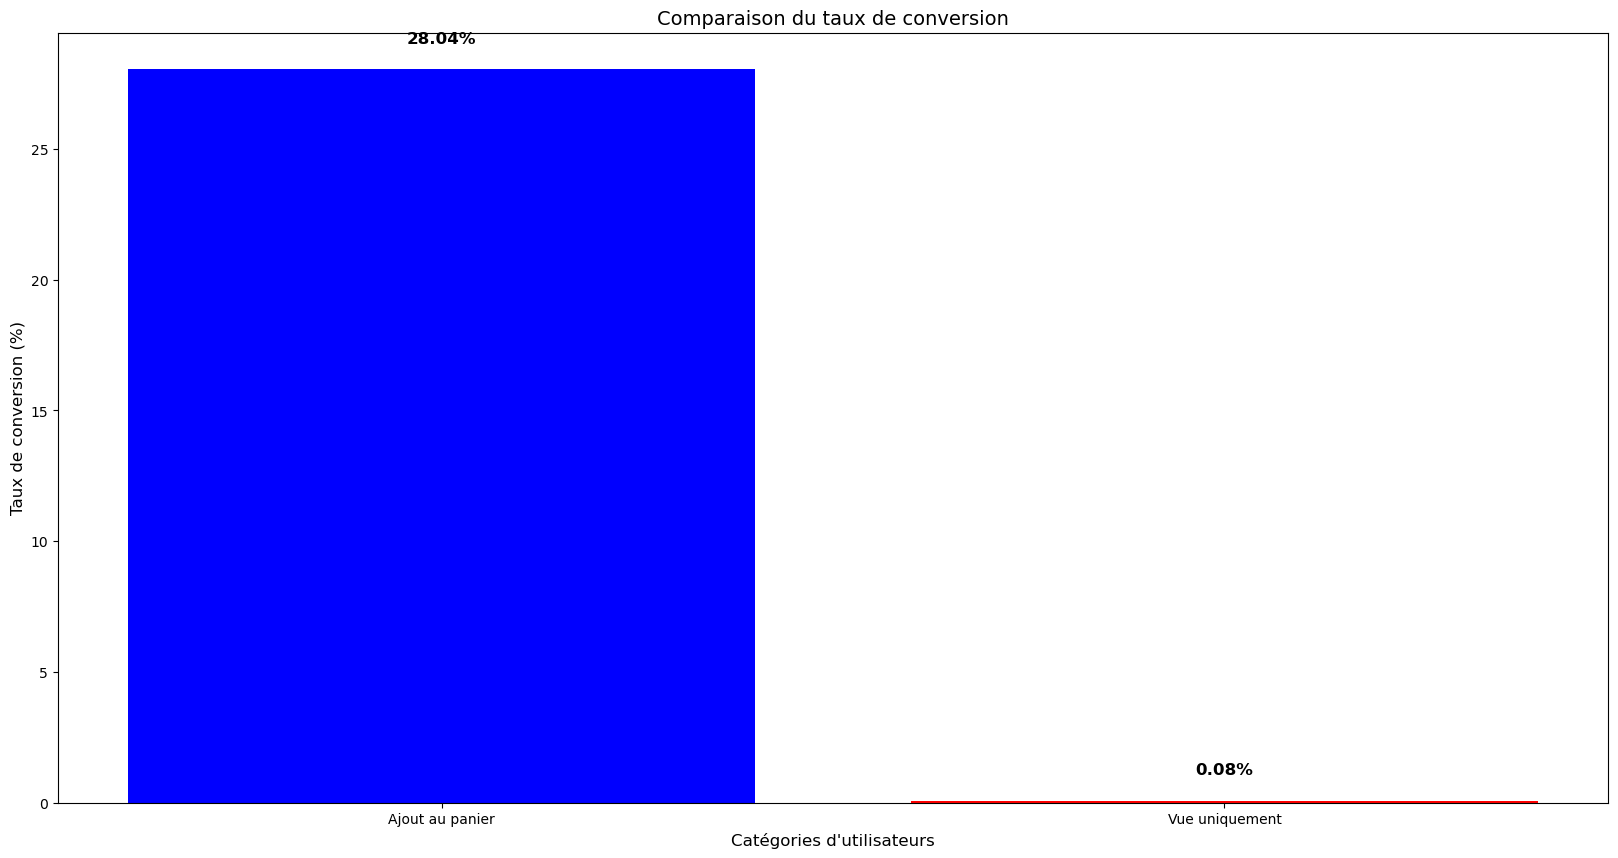

In [177]:
import matplotlib.pyplot as plt

# Données
categories = ['Ajout au panier', 'Vue uniquement']
taux_conversion = [28.04, 0.08]

# Création de la figure
plt.figure(figsize=(20, 10))  # Taille de la figure

# Tracer le graphique à barres
plt.bar(categories, taux_conversion, color=['blue', 'red'])

# Ajouter les labels
plt.xlabel("Catégories d'utilisateurs", fontsize=12)
plt.ylabel("Taux de conversion (%)", fontsize=12)
plt.title("Comparaison du taux de conversion", fontsize=14)


# Ajouter les valeurs au-dessus des barres
for i, v in enumerate(taux_conversion):
    plt.text(i, v + 1, f"{v}%", ha='center', fontsize=12, fontweight='bold')

# Affichage du graphique
plt.show()


.................................................................................................................................
.................................................................................................................................
.................................................................................................................................
.................................................................................................................................
.................................................................................................................................
.................................................................................................................................
# III. analyse sur la table item_properties_part1 et item_properties_part1
.................................................................................................................................
.................................................................................................................................
.................................................................................................................................
.................................................................................................................................
.................................................................................................................................
.................................................................................................................................